# Weighted Mode of Decision tree, Random Forest & KNN 
### Got 63.227% (Public) 48.169% (Private)

```submitted by
Yug Patel - CS23MTECH14019
Bhargav Patel - CS23MTECH11026

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
%matplotlib inline

In [2]:
data = pd.read_csv(r"iith_foml_2023_train.csv")
data.head()

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.2,...,NaN,NaN,15.04,104,12,2,32,1409,37677.1,1
1,909,0,235,32,1,1,1,1,-40.448,35779.4,...,2200.3,4900.005,12.03,20,1,0,13,909,25239.1,1
2,654,3,175,2,1,1,1,1,-27.445,35770.4,...,1973.3,10000.004,13.01,1,1,0,13,654,27683.5,1
3,1372,12,382,14,2,0,1,0,0.001,509.2,...,NaN,NaN,NaN,313,12,10,54,1377,39363.2,0
4,786,3,199,2,1,0,1,0,0.001,612.1,...,NaN,NaN,NaN,171,1,5,11,786,40044.4,2


In [5]:
data.isnull().sum() #along columns

Feature 1 (Discrete)            0
Feature 2 (Discrete)            0
Feature 3 (Discrete)            0
Feature 4 (Discrete)            0
Feature 5 (Discrete)            0
Feature 6 (Discrete)            0
Feature 7 (Discrete)            0
Feature 8 (Discrete)            0
Feature 9                      14
Feature 10                      1
Feature 11                      1
Feature 12                      1
Feature 13                      1
Feature 14                      1
Feature 15                     72
Feature 16                    669
Feature 17                    546
Feature 18                    330
Feature 19 (Discrete)           0
Feature 20 (Discrete)           0
Feature 21 (Discrete)           0
Feature 22 (Discrete)           0
Feature 23 (Discrete)           0
Feature 24                      1
Target Variable (Discrete)      0
dtype: int64

In [6]:
correlation_matrix = data.corr()
correlation_matrix.iloc[-1, :]

Feature 1 (Discrete)         -0.035219
Feature 2 (Discrete)         -0.053451
Feature 3 (Discrete)         -0.069282
Feature 4 (Discrete)         -0.014784
Feature 5 (Discrete)          0.191183
Feature 6 (Discrete)          0.282696
Feature 7 (Discrete)         -0.170527
Feature 8 (Discrete)          0.074167
Feature 9                     0.061550
Feature 10                    0.024457
Feature 11                    0.084739
Feature 12                    0.079235
Feature 13                    0.054799
Feature 14                    0.050529
Feature 15                   -0.120844
Feature 16                   -0.135530
Feature 17                   -0.194367
Feature 18                   -0.075879
Feature 19 (Discrete)         0.051699
Feature 20 (Discrete)         0.143286
Feature 21 (Discrete)        -0.045311
Feature 22 (Discrete)         0.052072
Feature 23 (Discrete)        -0.035562
Feature 24                    0.088112
Target Variable (Discrete)    1.000000
Name: Target Variable (Di

In [8]:
data.drop(['Feature 16','Feature 17','Feature 18'],axis=1,inplace=True)

In [9]:
data.isnull().sum(axis=1) #along rows

0      0
1      0
2      0
3      1
4      0
      ..
989    0
990    0
991    0
992    0
993    0
Length: 994, dtype: int64

In [7]:
correlation_matrix = data.corr()
correlation_matrix.iloc[-1, :]

Feature 1 (Discrete)         -0.035219
Feature 2 (Discrete)         -0.053451
Feature 3 (Discrete)         -0.069282
Feature 4 (Discrete)         -0.014784
Feature 5 (Discrete)          0.191183
Feature 6 (Discrete)          0.282696
Feature 7 (Discrete)         -0.170527
Feature 8 (Discrete)          0.074167
Feature 9                     0.061550
Feature 10                    0.024457
Feature 11                    0.084739
Feature 12                    0.079235
Feature 13                    0.054799
Feature 14                    0.050529
Feature 15                   -0.120844
Feature 16                   -0.135530
Feature 17                   -0.194367
Feature 18                   -0.075879
Feature 19 (Discrete)         0.051699
Feature 20 (Discrete)         0.143286
Feature 21 (Discrete)        -0.045311
Feature 22 (Discrete)         0.052072
Feature 23 (Discrete)        -0.035562
Feature 24                    0.088112
Target Variable (Discrete)    1.000000
Name: Target Variable (Di

In [8]:
data = pd.read_csv(r"iith_foml_2023_train.csv")
data_filled = data.fillna(data.mean())
data_filled.corr().iloc[-1,:]

Feature 1 (Discrete)         -0.035219
Feature 2 (Discrete)         -0.053451
Feature 3 (Discrete)         -0.069282
Feature 4 (Discrete)         -0.014784
Feature 5 (Discrete)          0.191183
Feature 6 (Discrete)          0.282696
Feature 7 (Discrete)         -0.170527
Feature 8 (Discrete)          0.074167
Feature 9                     0.059680
Feature 10                    0.024022
Feature 11                    0.083232
Feature 12                    0.077826
Feature 13                    0.053825
Feature 14                    0.049631
Feature 15                   -0.115707
Feature 16                   -0.075607
Feature 17                   -0.131365
Feature 18                   -0.061317
Feature 19 (Discrete)         0.051699
Feature 20 (Discrete)         0.143286
Feature 21 (Discrete)        -0.045311
Feature 22 (Discrete)         0.052072
Feature 23 (Discrete)        -0.035562
Feature 24                    0.086545
Target Variable (Discrete)    1.000000
Name: Target Variable (Di

In [43]:
df =  pd.read_csv(r"iith_foml_2023_train.csv")
columns_to_fill = ['Feature 15', 'Feature 16', 'Feature 17', 'Feature 18']
columns_to_fill_mean = ['Feature 9']
columns_to_fill_mode = ['Feature 10', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 24']

df[columns_to_fill] = df[columns_to_fill].fillna(0)

df[columns_to_fill_mean] = df[columns_to_fill_mean].fillna(df['Feature 9'].mean())


for column in columns_to_fill_mode:
    df[column] = df[column].fillna(df[column].mode()[0])

In [91]:
target_correlation_threshold = 0.15
selected_features = correlation_matrix[(correlation_matrix['Target Variable (Discrete)'] > target_correlation_threshold) | (correlation_matrix['Target Variable (Discrete)'] < -target_correlation_threshold)].index
subset_1=data[selected_features]
drop_subset_2=['Feature 9', 'Feature 10', 'Feature 13', 'Feature 14', 'Feature 19 (Discrete)', 'Feature 21 (Discrete)' , 'Feature 22 (Discrete)', 'Feature 23 (Discrete)']
drop_subset_3=['Feature 10', 'Feature 14', 'Feature 4 (Discrete)', 'Feature 23 (Discrete)']
drop_subset_4=['Feature 21 (Discrete)','Feature 3 (Discrete)','Feature 2 (Discrete)','Feature 18','Feature 9','Feature 19 (Discrete)','Feature 13','Feature 10', 'Feature 14', 'Feature 4 (Discrete)', 'Feature 23 (Discrete)','Feature 22 (Discrete)']
drop_subset_5=['Feature 14', 'Feature 23 (Discrete)']
drop_subset_6=['Feature 10', 'Feature 4 (Discrete)']
drop_subset_7=['Feature 10', 'Feature 4 (Discrete)', 'Feature 23 (Discrete)']
subset_2=df.drop(drop_subset_2,axis=1)
subset_3=df.drop(drop_subset_3,axis=1)
subset_4=data_filled.drop(drop_subset_4,axis=1)
subset_5=data_filled.drop(drop_subset_5,axis=1)
subset_6=data_filled.drop(drop_subset_6,axis=1)
subset_7=data_filled.drop(drop_subset_7,axis=1)

### New Analysis 

In [93]:
# Split the data into training and testing sets
X= subset_3.drop(['Target Variable (Discrete)'],axis=1)
y= subset_3['Target Variable (Discrete)']
X_actual_test = pd.read_csv('iith_foml_2023_test.csv').drop(drop_subset_3,axis=1)
X_actual_test = X_actual_test.fillna(X_actual_test.mean())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

### Model_1

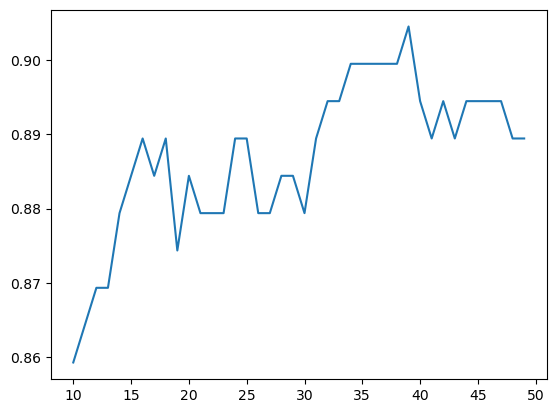

In [94]:
score_list = []
for i in range(10,50):
    
    model_1 = RandomForestClassifier(n_estimators=i, random_state=42)
    model_1.fit(X_train,y_train)
    score_list.append(model_1.score(X_test,y_test))
    
#y_pred = model_1.predict(X_test)

# Evaluate the model
#print("Accuracy:", accuracy_score(y_test, y_pred))
plt.plot(range(10,50),score_list)

In [95]:
model_1 = RandomForestClassifier(n_estimators=29, random_state=42) #previously 12
model_1.fit(X_train,y_train)
model_1.score(X_test,y_test)

0.8844221105527639

In [96]:
y_pred_1=model_1.predict(X_actual_test)
y_pred_1

array([ 6,  0,  1,  1,  1,  0,  1,  5,  1,  0,  1,  6,  0,  1,  1,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  6,  0,  1,  0,  0,  1,  1,  6,
        1,  0,  6,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  6,  1,  0,
        1,  1,  1,  1,  1,  6,  0,  0,  0,  1,  1,  1,  6,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  0,  1,  6,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,  2,  0,  1,  0,
        0,  1,  1,  1,  1,  0,  0,  2,  1,  0,  0,  0,  0,  6,  0,  1,  2,
        1,  0,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        1,  2,  1,  0,  0,  1,  0,  0,  1,  1,  6,  0,  1,  0,  1,  1,  6,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  2,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  5,  0,  0,  6,  1,  1,  0,  5,  1,  1,  1,  0,  1,  6,
        1,  1,  1,  0,  1, 14,  0,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  1,  6

In [97]:
model_1_1 = RandomForestClassifier(n_estimators=17,criterion="gini",random_state=42)
model_1_1.fit(X,y)
model_1_1.score(X_test,y_test)

1.0

In [98]:
y_pred_4 = model_1_1.predict(X_actual_test)
y_pred_4

array([ 6,  5,  1,  1,  1,  2,  1,  5,  5,  0,  1,  6,  0,  1,  1,  0,  1,
        1,  1,  1,  5,  2,  1,  1,  0,  0,  6,  1,  1,  0,  0,  1,  1,  6,
        1,  0,  6,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  6,  1,  2,
        1,  1,  1,  1,  1,  6,  2,  0,  0,  1,  1,  1,  6,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  0,  1,  6,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  2,  0,  1,  0,
        0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  6,  0,  1,  2,
        1,  0,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  2,
        1,  2,  1,  0,  0,  1,  0,  1,  1,  1,  6,  2,  1,  0,  1,  1,  6,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  2,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  2,  5,  1,  1,  0,  1,  1,
        5,  1,  1,  5,  0,  0,  6,  1,  1,  0,  1,  1,  1,  1,  0,  1,  6,
        1,  1,  1,  0,  1, 14,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  1,  6

### Model_2

In [99]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(criterion='entropy', max_depth= 7,random_state=1)
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)


0.8693467336683417

In [100]:
y_pred_2=model_2.predict(X_actual_test)
y_pred_2

array([ 6,  5,  1,  1,  8,  5,  1,  5,  5,  0,  1,  1,  0,  1,  5,  0,  2,
        1,  1,  1,  8,  2,  1,  1,  0,  1,  6,  0,  1,  0, 13,  1,  1,  6,
        1,  0,  6,  1,  0,  8, 14,  1,  1,  8,  0,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  6,  0,  0,  0,  1,  1,  1,  6,  1,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  6,  1,  1,  1,  1,  1,  5,  1,  0,  1,  6,
        0,  1,  1,  1,  1,  1,  0,  5,  1,  1,  1,  0,  1,  2,  0,  1,  2,
        0,  1,  1,  1,  8,  1,  0,  5,  1,  0,  0,  7,  0,  6,  0,  1,  5,
        1,  0,  1,  1,  1,  6,  1,  1,  5,  5,  1,  1,  1,  1,  0,  0,  5,
        2,  8,  1,  0,  0,  1,  0,  5,  1,  1,  6,  5,  1,  0,  1,  1,  6,
        8,  1,  1,  1,  0,  1,  1,  0,  1,  0,  7,  5,  6,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  2,  5,  1,  1,  5,  1,  1,
        5,  1,  1,  5,  0,  1,  6,  1,  1,  0,  1,  1,  1,  1,  0,  1,  6,
        1,  1,  1,  0,  1, 14,  0,  1,  5,  0,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  1,  6


### Model_3

In [101]:
from sklearn.neighbors import KNeighborsClassifier

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_for_knn=X[(X > (Q1 - 1.5 * IQR)) |(X < (Q3 + 1.5 * IQR))]
X_for_knn=X.fillna(X_for_knn.median())

X_train_for_knn, X_test_for_knn, y_train_for_knn, y_test_for_knn = train_test_split(X_for_knn,y,test_size = 0.2,random_state=1)

In [102]:
X_for_knn

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 11,Feature 12,Feature 13,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 24
0,1404,12,64,3,1,1,1,110.502,35797.1,0.000261,0.172,5000.5,0.0,0.000,15.04,104,12,2,32,37677.1
1,909,0,235,1,1,1,1,-40.448,35794.3,0.000178,0.032,3720.5,2200.3,4900.005,12.03,20,1,0,13,25239.1
2,654,3,175,1,1,1,1,-27.445,35803.3,0.000391,0.021,4685.4,1973.3,10000.004,13.01,1,1,0,13,27683.5
3,1372,12,382,2,0,1,0,0.001,513.5,0.000291,97.541,0.0,0.0,0.000,0.00,313,12,10,54,39363.2
4,786,3,199,1,0,1,0,0.001,697.3,0.006050,97.981,4.1,0.0,0.000,0.00,171,1,5,11,40044.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1388,0,382,2,0,1,0,0.002,656.5,0.002000,98.072,2700.4,0.0,0.000,0.00,104,12,11,53,41473.4
990,1339,0,344,3,0,1,0,0.002,540.3,0.001190,97.462,1.3,0.0,0.000,0.00,205,12,10,63,40916.2
991,527,7,40,5,2,1,3,0.005,19162.4,0.000627,64.825,1415.5,0.0,1000.002,7.02,101,6,7,95,37938.4
992,1144,12,120,3,0,1,0,0.003,803.3,0.001260,98.503,300.1,0.0,0.000,0.00,166,12,11,53,33433.5


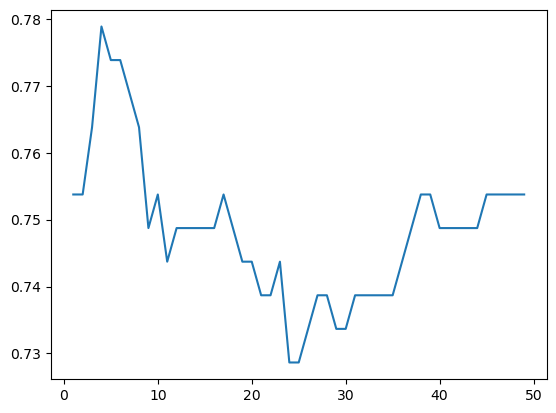

In [103]:
score_list = []
for i in range(1,50):
    model_3 = KNeighborsClassifier(n_neighbors = i, weights='distance',p=1)
    model_3.fit(X_train,y_train)
    score_list.append(model_3.score(X_test,y_test))
    
plt.plot(range(1,50),score_list)

In [104]:
model_3 = KNeighborsClassifier(n_neighbors =4, weights='distance',p=1)
model_3.fit(X_train_for_knn,y_train_for_knn)
model_3.score(X_test_for_knn,y_test_for_knn)

0.7788944723618091

In [105]:
y_pred_3=model_3.predict(X_actual_test)
y_pred_3

array([ 1,  0,  1,  1,  1,  2,  1,  5,  5,  1,  1,  1,  0,  1,  2,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  0,  6,  1,  1,  0, 14,  1,  1,  6,
        1,  0,  6,  0,  0,  1,  1,  1,  1,  1,  0,  2,  1,  0,  1,  1,  2,
        1,  1,  1,  1,  1,  6,  0,  0,  0,  1,  1,  1,  6,  1,  1,  2,  2,
        1,  1,  1,  0,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  0,  0,  6,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  2,  1,  0,  1,  1,  2,
        1,  1,  1,  1,  1,  0,  2,  0,  1,  0, 14,  0,  1,  6,  0,  1,  0,
        1,  0, 14,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        0,  2,  1,  0,  1,  1,  0,  1,  1,  1,  6,  0,  1,  1,  1,  1,  6,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,  1,
        1,  2,  1,  5,  0,  0,  6,  1,  1,  0,  2,  1,  1,  1,  0,  1,  6,
        1,  1,  1,  0,  1, 14,  0,  0,  0,  0,  2,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  6

### Weighted Mode 

In [106]:
from sklearn.utils.extmath import weighted_mode

In [107]:
w1=[1.1]*426
w2=[1.05]*426
w3=[1.0]*426
w4=[1.2]*426
x=[y_pred_1,y_pred_2,y_pred_3,y_pred_4]
weights = [w1,w2,w3,w4]
y_pred=weighted_mode(x, weights)
y_pred=y_pred[0][0].astype('int')

### Storing the CSV file

In [108]:
y_pred
# Create a DataFrame with 'Id' and 'Category'
df_predictions = pd.DataFrame({'Id': range(1, len(predicted_labels) + 1), 'Category': y_pred})

# Save the DataFrame to a CSV file
df_predictions.to_csv('predictions_weighted_mode.csv', index=False)

In [68]:
predicted_labels

array([ 6,  2,  1,  1,  1,  2,  1,  5,  5,  0,  1,  6,  0,  1,  2,  0,  2,
        1,  1,  1,  5,  2,  1,  1,  0,  2,  6,  0,  1,  0,  0,  1,  1,  6,
        1,  0,  6,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  6,  1,  1,
        1,  1,  1,  1,  1,  6,  2,  0,  0,  1,  1,  1,  6,  1,  1,  2,  2,
        1,  2,  1,  2,  1,  1,  6,  1,  1,  1,  1,  1,  5,  1,  0,  4,  6,
        0,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  0,  1,  2,  0,  1,  0,
        0,  1,  1,  1,  1,  2,  0,  2,  1,  0,  0,  0,  0,  6,  0,  1,  2,
        1,  0,  1,  1,  1,  6,  1,  1,  2,  1,  1,  1,  1,  1,  0,  0,  2,
        1,  2,  1,  0,  0,  1,  0,  2,  1,  1,  6,  1,  2,  0,  1,  1,  6,
        1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  8,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  2,  5,  1,  1,  2,  1,  1,
        1,  4,  1,  5,  0,  2,  6,  1,  1,  0,  2,  1,  1,  1,  0,  1,  6,
        1,  1,  1,  0,  1, 14,  0,  0,  0,  0,  2,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  1,  6